In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
df=pd.read_csv("./12-health_risk_classification.csv")
df.head()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bmi_score                 1000 non-null   float64
 1   blood_pressure_variation  1000 non-null   float64
 2   activity_level_index      1000 non-null   float64
 3   high_risk_flag            1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [4]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


<Axes: xlabel='blood_pressure_variation', ylabel='activity_level_index'>

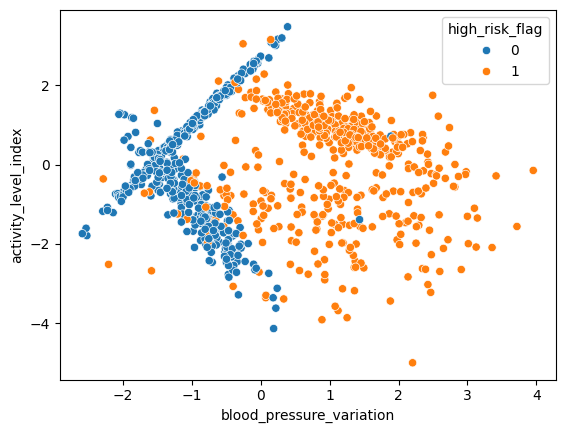

In [5]:
sns.scatterplot(x=df["blood_pressure_variation"],y=df["activity_level_index"],hue=df["high_risk_flag"])

In [6]:
X=df.drop("high_risk_flag",axis=1)
y=df["high_risk_flag"]

In [8]:
df["high_risk_flag"].value_counts() ## Balance Inbalance check

high_risk_flag
0    502
1    498
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=5,algorithm="auto",weights="uniform")
classifier.fit(X_train_scaled,y_train)
y_pred=classifier.predict(X_test_scaled)



In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy=accuracy_score(y_test,y_pred)
confusionmatrix=confusion_matrix(y_test,y_pred)
classificationreport=classification_report(y_test,y_pred)

print("accuract: ",accuracy)
print("confusionmatrix: \n",confusionmatrix)
print("classification report \n",classificationreport)

accuract:  0.952
confusionmatrix: 
 [[124   2]
 [ 10 114]]
classification report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       126
           1       0.98      0.92      0.95       124

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [20]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree",weights="uniform")
classifier.fit(X_train_scaled,y_train)
y_pred=classifier.predict(X_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
confusionmatrix=confusion_matrix(y_test,y_pred)
classificationreport=classification_report(y_test,y_pred)

print("accuracy: ",accuracy)
print("confusionmatrix: \n",confusionmatrix)
print("classification report \n",classificationreport)

accuracy:  0.952
confusionmatrix: 
 [[124   2]
 [ 10 114]]
classification report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       126
           1       0.98      0.92      0.95       124

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [21]:
classifier=KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree",weights="uniform")
classifier.fit(X_train_scaled,y_train)
y_pred=classifier.predict(X_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
confusionmatrix=confusion_matrix(y_test,y_pred)
classificationreport=classification_report(y_test,y_pred)

print("accuracy: ",accuracy)
print("confusionmatrix: \n",confusionmatrix)
print("classification report \n",classificationreport)

accuracy:  0.96
confusionmatrix: 
 [[125   1]
 [  9 115]]
classification report 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       126
           1       0.99      0.93      0.96       124

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



### KNN Regression

In [22]:
df_reg=pd.read_csv("./12-house_energy_regression.csv")
df_reg.head()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530


In [24]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avg_indoor_temp_change        1000 non-null   float64
 1   outdoor_humidity_level        1000 non-null   float64
 2   daily_energy_consumption_kwh  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bmi_score,1000.0,-0.023702,1.203694,-4.743951,-0.796655,0.142105,0.956225,2.321480
blood_pressure_variation,1000.0,0.016769,1.268761,-2.587178,-0.981320,-0.317137,1.017388,3.954873
activity_level_index,1000.0,-0.020771,1.392738,-4.999018,-1.057938,0.204506,1.061181,3.477210
high_risk_flag,1000.0,0.498000,0.500246,0.000000,0.000000,0.000000,1.000000,1.000000


<Axes: xlabel='avg_indoor_temp_change', ylabel='daily_energy_consumption_kwh'>

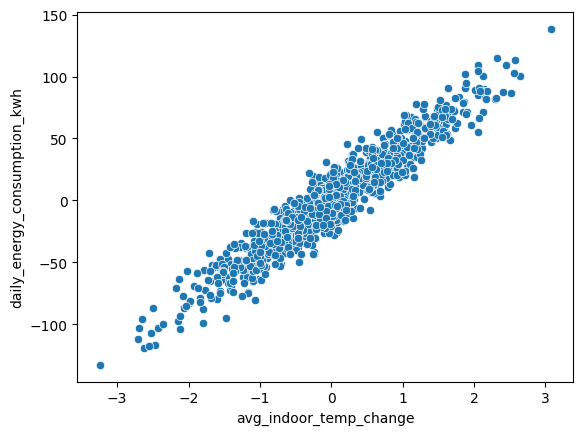

In [26]:
sns.scatterplot(x=df_reg["avg_indoor_temp_change"],y=df_reg["daily_energy_consumption_kwh"])

<Axes: xlabel='outdoor_humidity_level', ylabel='daily_energy_consumption_kwh'>

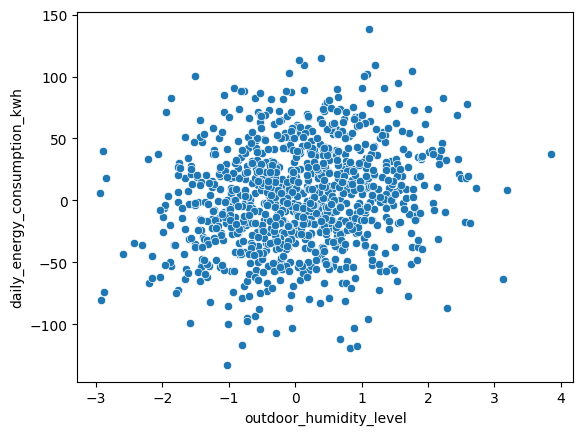

In [27]:
sns.scatterplot(x=df_reg["outdoor_humidity_level"],y=df_reg["daily_energy_consumption_kwh"])

<Axes: >

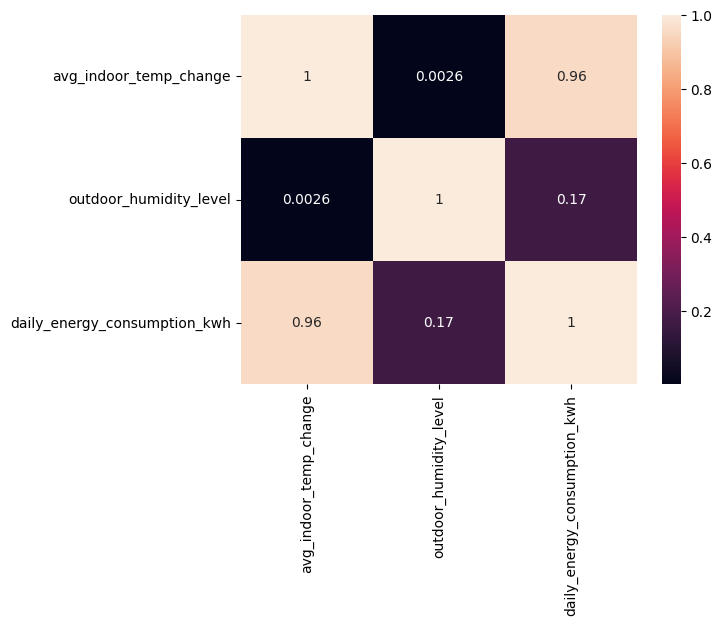

In [29]:
sns.heatmap(df_reg.corr(),annot=True)

In [30]:
X=df_reg.drop("daily_energy_consumption_kwh",axis=1)
y=df_reg["daily_energy_consumption_kwh"]

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.25,random_state=15)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

classifier=KNeighborsRegressor(n_neighbors=5,algorithm="auto")
classifier.fit(X_train_scaled,y_train)
y_pred=classifier.predict(X_test_scaled)

0.9078323874930146
9.807958542899264
159.19562699026926


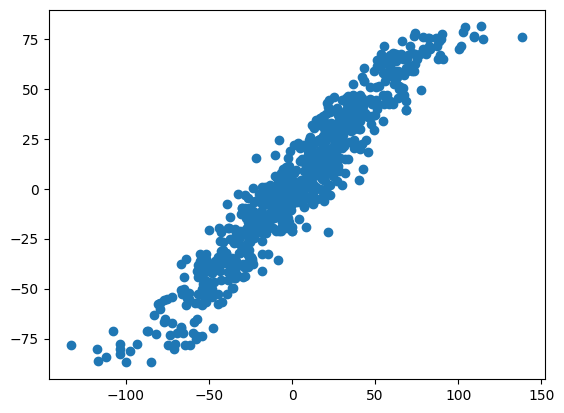

In [37]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(r2)
print(mae)
print(mse)

plt.scatter(y_test,y_pred)